# Gravitational orbit using Lagrangian equation



## Euler-Lagrange equation

For a two-body system, the Lagrangian with Cartesian coordinates is

$\begin{align}
  \mathcal{L} = \frac12 m_1 (\dot x_1 ^2 + \dot y_1 ^2) + \frac12 m_2 (\dot x_2 ^2 + \dot y_2 ^2)\
  + \frac{G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}}
\end{align}$

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x_1}} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 m_1  \ddot x_1 = \frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \ \mbox{and}\ \ddot x_1 = \frac {G m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y_1}} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 m_1  \ddot y_1 = \frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \ \mbox{and}\ \ddot y_1 = \frac {G m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x_2}} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
 m_2  \ddot x_2 = -\frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \ \mbox{and}\ \ddot x_2 = -\frac {G m_1} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y_2}} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 m_2  \ddot y_2 = -\frac {G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \ \mbox{and}\ \ddot y_2 = -\frac {G m_1} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \;.
\end{align}$

Now we can use the equations above to solve this problem.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Orbit class and utility functions

In [4]:
class Orbit():
    """
    Orbit class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    m1 : float
        mass of first body
    m2 : float
        mass of second body
    G : float
        gravitational constant

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1.,m3=1, G=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.m3=m3
        self.G = G

    
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        
        Parameters
        ----------
        t : float
            time 
        z : float
            A 8-component vector with 
                                    z[0] = x_1(t) and z[1] = x_dot_1(t)
                                    z[2] = y_1(t) and z[3] = y_dot_1(t)
                                    z[4] = x_2(t) and z[5] = x_dot_2(t)
                                    z[6] = y_2(t) and z[7] = y_dot_2(t)
            
            
        Returns
        -------
        
        """
        dom = np.sqrt((z[0]-z[4])**2+(z[2]-z[6])**2)
    
        
        return [\
                z[1], self.G *self.m2 * (z[4]-z[0])/dom**3, \
                z[3], self.G *self.m2 * (z[6]-z[2])/dom**3,\
                z[5], -self.G *self.m1 * (z[4]-z[0])/dom**3,\
                z[7], -self.G *self.m1 * (z[6]-z[2])/dom**3,\
               ]
    
    
    
    def solve_ode(self, t_pts, z_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts,method = 'RK23', 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y

        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    
    def solve_ode_Leapfrog(self, t_pts, z_0):
        """
        Solve the ODE givin conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x_1_0, x_dot_1_0, y_1_0, y_dot_1_0, \
                x_2_0, x_dot_2_0, y_2_0, y_dot_2_0 = z_0
        
        # initialize the arrays with zeroes
        num_t_pts = len(t_pts)
        
        x_1 = np.zeros(num_t_pts)
        x_dot_1 = np.zeros(num_t_pts)
        x_dot_1_half = np.zeros(num_t_pts)
        
        y_1 = np.zeros(num_t_pts)
        y_dot_1 = np.zeros(num_t_pts)
        y_dot_1_half = np.zeros(num_t_pts)
        
        x_2 = np.zeros(num_t_pts)
        x_dot_2 = np.zeros(num_t_pts)
        x_dot_2_half = np.zeros(num_t_pts)
        
        y_2 = np.zeros(num_t_pts)
        y_dot_2 = np.zeros(num_t_pts)
        y_dot_2_half = np.zeros(num_t_pts)
        
        # intial conditions
        x_1[0]=x_1_0
        x_dot_1[0]=x_dot_1_0
        
        y_1[0]=y_1_0
        y_dot_1[0]=y_dot_1_0
        
        x_2[0]=x_2_0
        x_dot_2[0]=x_dot_2_0
        
        y_2[0]=y_2_0
        y_dot_2[0]=y_dot_2_0
        
        # step through the differetial equation
        for i in np.arange(num_t_pts - 1):
            t=t_pts[i]
            z=[x_1[i], x_dot_1[i],y_1[i],y_dot_1[i], \
              x_2[i], x_dot_2[i],y_2[i],y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1_half[i]=x_dot_1[i]+out[1]*delta_t/2.
            x_1[i+1]=x_1[i]+x_dot_1_half[i]*delta_t
            
            y_dot_1_half[i]=y_dot_1[i]+out[3]*delta_t/2.
            y_1[i+1]=y_1[i]+y_dot_1_half[i]*delta_t
             
            x_dot_2_half[i]=x_dot_2[i]+out[5]*delta_t/2.
            x_2[i+1]=x_2[i]+x_dot_2_half[i]*delta_t
            
            y_dot_2_half[i]=y_dot_2[i]+out[7]*delta_t/2.
            y_2[i+1]=y_2[i]+y_dot_2_half[i]*delta_t
            
            z=[x_1[i+1], x_dot_1[i],y_1[i+1],y_dot_1[i], \
            x_2[i+1], x_dot_2[i],y_2[i+1],y_dot_2[i]]
            out = self.dz_dt(t,z)
            
            x_dot_1[i+1] = x_dot_1_half[i]+out[1]*delta_t/2.
            y_dot_1[i+1] = y_dot_1_half[i]+out[3]*delta_t/2.
            x_dot_2[i+1] = x_dot_2_half[i]+out[5]*delta_t/2.
            y_dot_2[i+1] = y_dot_2_half[i]+out[7]*delta_t/2.
        
        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2
    
    def solve_ode_Leapfrog_n(self,t_pts,z_0):
        """
        Solve the ODE givin initial conditions with the Leapfrog method.
        Now works for arbitrary number of points. z_0 should have
        dimension 4n: (x_0,xdot_0,y_0,ydot_0) times (1,...,n)
        while z is a 2d array with shape 4n by len(t_pts).
        (This becomes 6n when it comes to three dimensions.)
        """
        delta_t=t_pts[1]-t_pts[0]
        
        #initialize the z array with zeroes
        num_t_pts = len(t_pts)    # number of time points
        n_tot = len(z_0)
        z = np.zeros(shape=(n_tot,num_t_pts) )
        dot_half = np.zeros (int(n_tot/2))
        
        # initial conditions
        z[:,0]=z_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t=t_pts[i]
            
            z_now=z[:,i]
            out=np.asarray(self.dz_dt(t,z_now))   # convert to numpy array
            
            dot_half = z_now[1::2] + out[1::2]*delta_t/2.
            z[0::2,i+1] = z_now[0::2] + dot_half*delta_t
            
            z_now[0::2]=z[0::2,i+1]
            out=np.asarray(self.dz_dt(t,z_now))  # convert to numpy array 
            
            z[1::2,i+1] = dot_half+out[1::2]*delta_t/2.
            
            return z

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [7]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make orbit plots

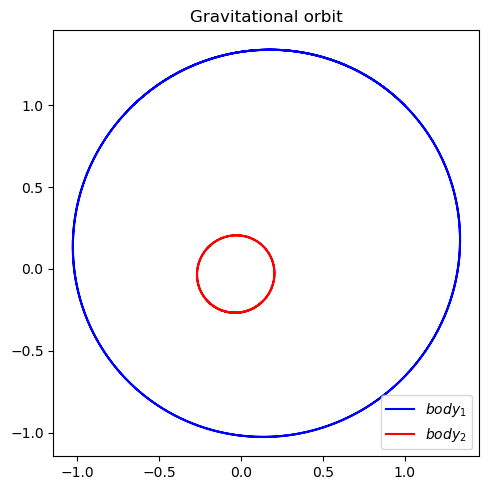

In [8]:
# Labels for individual plot axes
orbit_labels=(r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 5.
G = 1.

# Instantiate a Two-body system
p1 = Orbit(m1=m1, m2=m2, G=G)

# inital conditions with the velocity of the center of mass equals to zero.

x_1_0, x_dot_1_0 = 1, -1
y_1_0, y_dot_1_0 = 1, 1
x_2_0,x_dot_2_0 = - (m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0,y_dot_2_0 = - (m1/m2) * y_1_0, - (m1/m2) * y_dot_1_0

z_0=[x_1_0,x_dot_1_0,y_1_0,y_dot_1_0, \
    x_2_0,x_dot_2_0,y_2_0,y_dot_2_0]


x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = p1.solve_ode(t_pts,z_0)

# Now we can make the figure
fig=plt.figure(figsize=(5,5))


ax=fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue',label='$body_1$')
ax.plot(x_2,y_2,color = 'red',label='$body_2$')
ax.set_title('Gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Gravitational_orbit.png',bbox_inches='tight')


In [9]:
# From the figure above, we can find that both of the two bodies have circular orbits and the radius of their orbits vary.

## (b) Now let us make one of the bodies very heavy

In [ ]:
# Labels for individual plot axes
orbit_labels=(r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 20.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 20.  # make m1 heavy
m2 = 1
G = 20.

# Instantiate a Two-body system
p1 = Orbit(m1=m1, m2=m2, G=G)

# inital conditions with the velocity of the center of mass equals to zero.

x_1_0, x_dot_1_0 = 0.1, 0
y_1_0, y_dot_1_0 = 0, 0.75
x_2_0,x_dot_2_0 = - (m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0,y_dot_2_0 = - (m1/m2) * y_1_0, - (m1/m2) * y_dot_1_0

z_0=[x_1_0,x_dot_1_0,y_1_0,y_dot_1_0, \
    x_2_0,x_dot_2_0,y_2_0,y_dot_2_0]


x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = p1.solve_ode(t_pts,z_0)

# Now we can make the figure
fig=plt.figure(figsize=(5,5))


ax=fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue',label='$body_1$')
ax.plot(x_2,y_2,color = 'red',label='$body_2$')
ax.set_title('Gravitational orbit(b)')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Gravitational_orbit_(b).png',bbox_inches='tight')

In [ ]:
# By making body1 very heavy, we can see from the plot that body1 can be treated as stationary since its orbit is super tiny.
# Hence, this problem reduce to the simple orbit we talked about in class.

## Solve the differential equations using Leapfrog method
Now we switch to the Leapfrog method.

Since we have already defined solve_ode_Leapfrog above, we simply need to repeat previous steps and call the function during this process.

In [ ]:
# Labels for individual plot axes
orbit_labels=(r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 5.
G = 1.

# Instantiate a Two-body system
p1 = Orbit(m1=m1, m2=m2, G=G)

# inital conditions with the velocity of the center of mass equals to zero.

x_1_0, x_dot_1_0 = 1, -1
y_1_0, y_dot_1_0 = 1, 1
x_2_0,x_dot_2_0 = - (m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0,y_dot_2_0 = - (m1/m2) * y_1_0, - (m1/m2) * y_dot_1_0

z_0=[x_1_0,x_dot_1_0,y_1_0,y_dot_1_0, \
    x_2_0,x_dot_2_0,y_2_0,y_dot_2_0]


x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = p1.solve_ode_Leapfrog(t_pts,z_0) # replace the original "solve_ode function"

# Now we can make the figure
fig=plt.figure(figsize=(5,5))


ax=fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue',label='$body_1$')
ax.plot(x_2,y_2,color = 'red',label='$body_2$')
ax.set_title('Gravitational orbit with Leapfrog')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Gravitational_orbit_Leapfrog.png',bbox_inches='tight')


In [ ]:
# We can see that the plot we get using Leapfrog method is basically the same as the previous plot using solve_ode.

## Now let's check for conservation of energy. 
We can do this by making a "change in energy with time" plot.

In [ ]:
# The total energy we get with Leapfrog method can be defined as follows:
def Energy_LF(t_pts, z_0):
            """Evaluate the energy as a function of time"""
            return ((m1*m2/(m1+m2))/2.) * ((x_dot_1- x_dot_2)**2+(y_dot_1-y_dot_2)**2)+ G*m1*m2/np.sqrt((x_1-x_2)**2+ (y_1-y_2)**2)  

In [ ]:
E_tot_pts = Energy_LF(t_pts, z_0)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

In [ ]:
fig_5 = plt.figure(figsize=(6,6))


ax_5a = fig_5.add_subplot(1,1,1)
#ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_5a.semilogy(t_pts, E_tot_rel_pts, 
               color='green', label=r'$\Delta E(t)$ Leapfrog')

ax_5a.set_ylim(1.e-10, 1.e4)    # (1.e-12, 5)
ax_5a.set_xlim(1.e-10, 10)
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in energy with time')
ax_5a.legend()

fig_5.tight_layout()
fig_5.savefig('Leapfrog_energy_test_1.png', dpi=200, bbox_inches='tight')

In [ ]:
# From this plot, we can find that the change of energy stays around 0. So the evergy is conserved.

## Animate the orbits !

In [ ]:
# Labels for individual plot axes
orbit_labels=(r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 5.
G = 1.

# Instantiate a Two-body system
p1 = Orbit(m1=m1, m2=m2, G=G)

# inital conditions with the velocity of the center of mass equals to zero.

x_1_0, x_dot_1_0 = 1, -1
y_1_0, y_dot_1_0 = 1, 1
x_2_0,x_dot_2_0 = - (m1/m2) * x_1_0, - (m1/m2) * x_dot_1_0
y_2_0,y_dot_2_0 = - (m1/m2) * y_1_0, - (m1/m2) * y_dot_1_0

z_0=[x_1_0,x_dot_1_0,y_1_0,y_dot_1_0, \
    x_2_0,x_dot_2_0,y_2_0,y_dot_2_0]


x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = p1.solve_ode(t_pts,z_0)

# Now we can make the figure
fig=plt.figure(figsize=(5,5))


ax=fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue',label='$body_1$')
ax.plot(x_2,y_2,color = 'red',label='$body_2$')
ax.set_title('Gravitational orbit')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Gravitational_orbit.png',bbox_inches='tight')


In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
%%capture

x_min=-2
x_max=-x_min
y_min=-2
y_max=-y_min

fig_anim=plt.figure(figsize=(5,3), num='orbit')
ax_anim=fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min,x_max)
ax_anim.set_ylim(y_min,y_max)

ln1_anim, = ax_anim.plot(x_1,y_1,color='blue',lw=1)
ln2_anim, =ax_anim.plot(x_2,y_2,color='red',lw=1)

pt1_anim, = ax_anim.plot(x_1[0],y_1[0],'o',markersize=8,color='blue')
pt2_anim, = ax_anim.plot(x_2[0],y_2[0],'o',markersize=8,color='red')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [ ]:
def animate_orbits(i):
    
    i_skip=1*i
    
    pt1_anim.set_data(x_1[i_skip],y_1[i_skip])
    pt2_anim.set_data(x_2[i_skip],y_2[i_skip])
    
    return (pt1_anim,pt2_anim)

In [ ]:
frame_interval=10.
frame_number=1001
anim=animation.FuncAnimation(fig_anim,
                           animate_orbits,
                           init_func=None,
                           frames=frame_number,
                           interval=frame_interval,
                           blit=True,
                           repeat=False)

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
# From the animation, we can find that the bodies move faster when they get closer, and slower when they get farther.

## Three body orbits
The idea is the same as the process above, we need to compute the Lagrangian again and add the parameters for body3.

## Lagrangian for a three-body system

For a three-body system, the Lagrangian with Cartesian coordinates is

$\begin{align}
  \mathcal{L} = \frac12 m_1 (\dot x_1 ^2 + \dot y_1 ^2) + \frac12 m_2 (\dot x_2 ^2 + \dot y_2 ^2) \
  +\frac12 m_3 (\dot x_3 ^2 + \dot y_3 ^2)+ \frac{G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}} \
  +\frac{G m_1 m_3} {\sqrt{(x_1 - x_3)^2 + (y_1 - y_3)^2}}+\frac{G m_2 m_3} {\sqrt{(x_3 - x_2)^2 + (y_3 - y_2)^2}}
\end{align}$

The Euler-Lagrange equations are:


$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x_1}} = \frac{\partial\mathcal L}{\partial x_1}
 \quad\Longrightarrow\quad
 \ \ddot x_1 = \frac {G m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \; + \frac {G m_3} {\sqrt{(x_1 - x_3)^2 + (y_1 - y_3)^2}^3} (x_3 - x_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y_1}} = \frac{\partial\mathcal L}{\partial y_1}
 \quad\Longrightarrow\quad
 \ \ddot y_1 = +\frac {G m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \; + \frac {G m_3} {\sqrt{(x_1 - x_3)^2 + (y_1 - y_3)^2}^3} (y_3 - y_1)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x_2}} = \frac{\partial\mathcal L}{\partial x_2}
 \quad\Longrightarrow\quad
\ \ddot x_2 = -\frac {G m_1} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (x_2 - x_1)
  \; - \frac {G m_3} {\sqrt{(x_3 - x_2)^2 + (y_3 - y_2)^2}^3} (x_2 - x_3)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y_2}} = \frac{\partial\mathcal L}{\partial y_2}
 \quad\Longrightarrow\quad
 \ \ddot y_2 = -\frac {G m_1} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}^3} (y_2 - y_1)
  \; -\frac {G m_3} {\sqrt{(x_3 - x_2)^2 + (y_3 - y_2)^2}^3} (y_2 - y_3)
  \;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{x_3}} = \frac{\partial\mathcal L}{\partial x_3}
 \quad\Longrightarrow\quad
 \ \ddot x_3= \frac {G m_2} {\sqrt{(x_3 - x_2)^2 + (y_3 - y_2)^2}^3} (x_2 - x_3)\; -\frac {G m_1} {\sqrt{(x_1 - x_3)^2 + (y_1 - y_3)^2}^3} (x_3 - x_1)\;.
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{y_3}} = \frac{\partial\mathcal L}{\partial y_3}
 \quad\Longrightarrow\quad
 \ \ddot y_3= \frac {G m_2} {\sqrt{(x_3 - x_2)^2 + (y_3 - y_2)^2}^3} (y_2 - y_3)\; -\frac {G m_1} {\sqrt{(x_1 - x_3)^2 + (y_1 - y_3)^2}^3} (y_3 - y_1)\;
\end{align}$

Now we can use the equations above to solve this problem. 

## Three-body Orbit class and functions

In [ ]:
class Orbit_3():
    """
    Orbit class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    m1 : float
        mass of first body
    m2 : float
        mass of second body
    m3: float
        mass of third body
    G : float
        gravitational constant

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1.,m3=1, G=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.m3=m3
        self.G = G

    
    def dz_dt_3(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        
        Parameters
        ----------
        t : float
            time 
        z : float
            A 12-component vector with 
                                    z[0] = x_1(t) and z[1] = x_dot_1(t)
                                    z[2] = y_1(t) and z[3] = y_dot_1(t)
                                    z[4] = x_2(t) and z[5] = x_dot_2(t)
                                    z[6] = y_2(t) and z[7] = y_dot_2(t)
                                    z[8] = x_3(t) and z[9] = x_dot_3(t)
                                    z[10] = y_3(t) and z[11] = y_dot_3(t)
            
            
        Returns
        -------
        
        """
        dom1 = np.sqrt((z[0]-z[4])**2+(z[2]-z[6])**2)
        dom2= np.sqrt((z[0]-z[8])**2+(z[2]-z[10])**2)
        dom3= np.sqrt((z[8]-z[4])**2+(z[10]-z[6])**2)
    
        
        return [\
                z[1], self.G *self.m2 * (z[4]-z[0])/dom1**3 + self.G *self.m3 * (z[8]-z[0])/dom2**3, \
                z[3], self.G *self.m2 * (z[6]-z[2])/dom1**3 + self.G *self.m3 * (z[10]-z[2])/dom2**3,\
                z[5], -self.G *self.m1 * (z[4]-z[0])/dom1**3 - self.G *self.m3 * (z[4]-z[8])/dom3**3,\
                z[7], -self.G *self.m1 * (z[6]-z[2])/dom1**3 - self.G *self.m3 * (z[6]-z[10])/dom3**3,\
                z[9], self.G *self.m2 * (z[4]-z[8])/dom3**3 + self.G *self.m1 * (z[8]-z[0])/dom2**3, \
                z[11], self.G *self.m2 * (z[6]-z[10])/dom3**3 + self.G *self.m1 * (z[10]-z[2])/dom2**3,\
               ]
    
    
    
    def solve_ode_3(self, t_pts, z_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.dz_dt_3, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts,method = 'RK23', 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2,x_3, x_dot_3, y_3, y_dot_3 = solution.y

        return x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2,x_3, x_dot_3, y_3, y_dot_3

In [ ]:
def plot_y_vs_x_3(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [ ]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make the three-body orbits:

In [ ]:
# Labels for individual plot axes
orbit_labels=(r'$x$', r'$y$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 1.
m3= 5
G = 1

# Instantiate a Two-body system
p2 = Orbit_3(m1=m1, m2=m2,m3=m3, G=G)

# inital conditions with the velocity of the center of mass equals to zero.

x_1_0, x_dot_1_0 = 1, -1
y_1_0, y_dot_1_0 = 1, 1
x_2_0,x_dot_2_0 = -1,0
y_2_0,y_dot_2_0 = 0.11, 0.75
x_3_0, x_dot_3_0 = -(m1/m3)*x_1_0 - (m2/m3)*x_2_0, -(m1/m3)*x_dot_1_0 - (m2/m3)*x_dot_2_0
y_3_0, y_dot_3_0 = -(m1/m3)*y_1_0 - (m2/m3)*y_2_0, -(m1/m3)*y_dot_1_0 - (m2/m3)*y_dot_2_0

z_0=[x_1_0,x_dot_1_0,y_1_0,y_dot_1_0, \
    x_2_0,x_dot_2_0,y_2_0,y_dot_2_0, \
    x_3_0,x_dot_3_0,y_3_0,y_dot_3_0]


x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2,x_3, x_dot_3, y_3, y_dot_3, = p2.solve_ode_3(t_pts,z_0)

# Now we can make the figure
fig=plt.figure(figsize=(5,5))


ax=fig.add_subplot(1,1,1)
start,stop = start_stop_indices(t_pts,t_start,t_end)
ax.plot(x_1,y_1,color='blue',label='$body_1$')
ax.plot(x_2,y_2,color = 'red',label='$body_2$')
ax.plot(x_3,y_3,color = 'green',label='$body_3$')
ax.set_title('Gravitational orbit_3bodies')
ax.legend()
ax.set_aspect(1)

fig.tight_layout()
fig.savefig('Gravitational_orbit_3.png',bbox_inches='tight')


In [ ]:
# According to the plot, we can conclude that for the initial conditions chosen by myself, the resulting three-body orbits are very chaotic.

## Animate the three-body orbits.
The method of animating it is exactly the same as the 2-body animation, we just need to add the parameters for body3.

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
%%capture

x_min=-3
x_max=-x_min
y_min=-3
y_max=-y_min

fig_anim=plt.figure(figsize=(5,3), num='orbit')
ax_anim=fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min,x_max)
ax_anim.set_ylim(y_min,y_max)

ln1_anim, = ax_anim.plot(x_1,y_1,color='blue',lw=1)
ln2_anim, =ax_anim.plot(x_2,y_2,color='red',lw=1)
ln3_anim, =ax_anim.plot(x_3,y_3,color='green',lw=1)

pt1_anim, = ax_anim.plot(x_1[0],y_1[0],'o',markersize=8,color='blue')
pt2_anim, = ax_anim.plot(x_2[0],y_2[0],'o',markersize=8,color='red')
pt3_anim, = ax_anim.plot(x_3[0],y_3[0],'o',markersize=8,color='green')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [ ]:
def animate_orbits(i):
    
    i_skip=1*i
    
    pt1_anim.set_data(x_1[i_skip],y_1[i_skip])
    pt2_anim.set_data(x_2[i_skip],y_2[i_skip])
    pt3_anim.set_data(x_3[i_skip],y_3[i_skip])
    
    return (pt1_anim,pt2_anim,pt3_anim)

frame_interval=10.
frame_number=1001
anim=animation.FuncAnimation(fig_anim,
                           animate_orbits,
                           init_func=None,
                           frames=frame_number,
                           interval=frame_interval,
                           blit=True,
                           repeat=False)

In [ ]:
HTML(anim.to_jshtml())

In [ ]:
# The animation shows how the three bodies move along theses chaotic orbits.
# As before, we can find that the bodies will move faster if they are close to other ones.